In [1]:
import json
from pybbn.graph.dag import Bbn
from pybbn.pptc.inferencecontroller import InferenceController
from pybbn.graph.jointree import EvidenceBuilder
import random
import time

def get_jt():
    with open('singly-bbn.json', 'r') as f:
        bbn = Bbn.from_dict(json.loads(f.read()))
        jt = InferenceController.apply(bbn)
        return jt
    
def get_evidence(jt, name, val):
    return EvidenceBuilder() \
        .with_node(jt.get_bbn_node_by_name(name)) \
        .with_evidence(val, 1.0) \
        .build()
    
def get_evidences(jt):
    max_nodes = random.randint(1, 20)
    
    ids = list(node_ids)
    random.shuffle(ids)
    
    ids = ids[:max_nodes]
    ids = {i: random.choice(['state0', 'state1']) for i in ids}
    ids = [get_evidence(jt, n, v) for n, v in ids.items()]
    
    return ids

def do_inference():
    # get bbn
    start = time.time()
    with open('singly-bbn.json', 'r') as f:
        bbn = Bbn.from_dict(json.loads(f.read()))
        
    stop = time.time()
    b_diff = stop - start
    
    # get jt
    start = time.time()
    jt = InferenceController.apply(bbn)
    
    stop = time.time()
    j_diff = stop - start
    
    # get evidence
    start = time.time()
    evidences = get_evidences(jt)
    
    stop = time.time()
    e_diff = stop - start
    
    # clear evidence
    start = time.time()
    jt.unobserve_all()
    
    stop = time.time()
    c_diff = stop - start
    
    # update evidence
    start = time.time()
    jt.update_evidences(evidences)
    
    stop = time.time()
    u_diff = stop - start
    
    return len(evidences), b_diff, j_diff, e_diff, c_diff, u_diff
    
node_ids = [f'{n}' for n in range(900)]

In [2]:
import pandas as pd

df = pd.DataFrame([do_inference() for _ in range(10)], columns=['n', 'b_time', 'j_time', 'e_time', 'c_time', 'u_time'])
df.shape

(10, 6)

In [3]:
df.head(10)

,n,b_time,j_time,e_time,c_time,u_time
0,20,0.032930,3.336133,0.005897,0.003824,0.048974
1,20,0.007845,3.323056,0.006034,0.003786,0.056455
2,20,0.007930,3.373107,0.006498,0.003824,0.055931
3,2,0.008354,3.353920,0.000939,0.003617,0.050509
4,16,0.007763,3.251286,0.004887,0.003487,0.049918
5,7,0.007678,3.259727,0.002409,0.003477,0.050610
6,13,0.007813,3.243876,0.004050,0.003505,0.050020
7,18,0.007653,3.249064,0.005521,0.003518,0.049927
8,14,0.007629,3.266158,0.004331,0.003483,0.049988
9,16,0.007670,3.248481,0.004922,0.003490,0.052439


In [4]:
df.mean()

n         14.600000
b_time     0.010327
j_time     3.290481
e_time     0.004549
c_time     0.003601
u_time     0.051477
dtype: float64

In [5]:
df.describe()

,n,b_time,j_time,e_time,c_time,u_time
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,14.600000,0.010327,3.290481,0.004549,0.003601,0.051477
std,5.985167,0.007945,0.050246,0.001730,0.000151,0.002639
min,2.000000,0.007629,3.243876,0.000939,0.003477,0.048974
25%,13.250000,0.007672,3.249619,0.004120,0.003488,0.049942
50%,16.000000,0.007788,3.262943,0.004905,0.003511,0.050264
75%,19.500000,0.007909,3.332864,0.005803,0.003744,0.051982
max,20.000000,0.032930,3.373107,0.006498,0.003824,0.056455


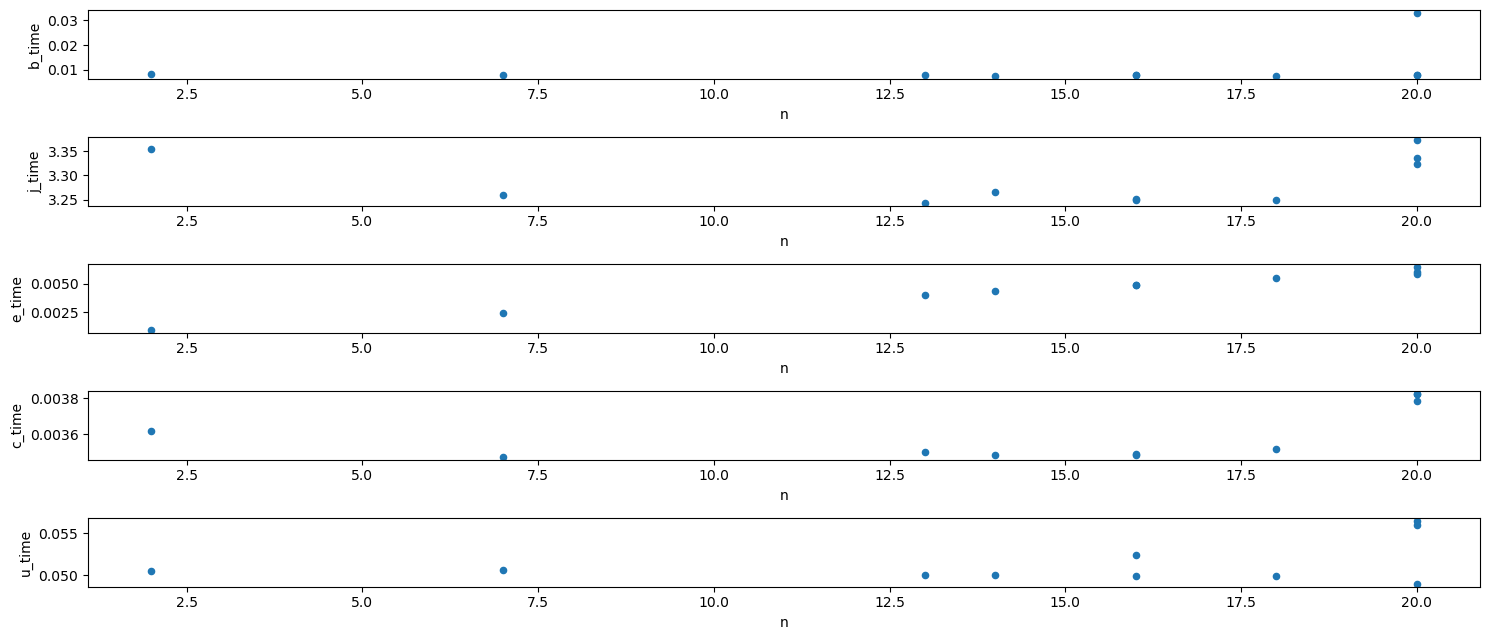

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(5, 1, figsize=(15, 6.5))
ax = np.ravel(ax)

df.plot(kind='scatter', x='n', y='b_time', ax=ax[0])
df.plot(kind='scatter', x='n', y='j_time', ax=ax[1])
df.plot(kind='scatter', x='n', y='e_time', ax=ax[2])
df.plot(kind='scatter', x='n', y='c_time', ax=ax[3])
df.plot(kind='scatter', x='n', y='u_time', ax=ax[4])

plt.tight_layout()

In [7]:
from sklearn.linear_model import LinearRegression

X = df[['n']]
y = df['b_time']

m = LinearRegression()
m.fit(X, y)

m.intercept_, m.coef_

(0.004442004796588981, array([0.00040305]))

In [8]:
X = df[['n']]
y = df['j_time']

m = LinearRegression()
m.fit(X, y)

m.intercept_, m.coef_

(3.2842460950610066, array([0.00042703]))

In [9]:
X = df[['n']]
y = df['e_time']

m = LinearRegression()
m.fit(X, y)

m.intercept_, m.coef_

(0.0003463090501411364, array([0.00028784]))

In [10]:
X = df[['n']]
y = df['c_time']

m = LinearRegression()
m.fit(X, y)

m.intercept_, m.coef_

(0.0034302311854681957, array([1.17048436e-05]))

In [11]:
X = df[['n']]
y = df['u_time']

m = LinearRegression()
m.fit(X, y)

m.intercept_, m.coef_

(0.04906222068938074, array([0.0001654]))